In [1]:
from matplotlib import pyplot as plt
import numpy as np
import json
import os

In [2]:
usages = [x for x in os.listdir() if x.endswith('-usage.json')]

In [3]:
raw = {}
for name in usages:
    with open(name, 'r') as f:
        raw[name] = json.load(f)
list(raw.values())[0][0].keys()

dict_keys(['ppid', 'ctime', 'pid', 'elapsed', 'cpu', 'memory', 'timestamp'])

In [4]:
cpus = {
    x: np.array([z['cpu'] for z in y])
    for x,y in raw.items()
}
mems = {
    x: np.array([z['memory'] for z in y])
    for x,y in raw.items()
}
ctimes = {
    x: np.array([z['ctime'] for z in y])
    for x,y in raw.items()
}

youtube1-usage.json 0.0
realtime-apps1-usage.json 0.034482758620689655
miner2-usage.json 0.0
news-with-ads1-usage.json 0.0
miner1-usage.json 0.02097902097902098
google-news1-usage.json 0.8541666666666666


/Users/zyu/default-py3env/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


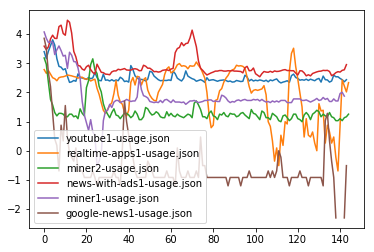

In [8]:
for name, cpu in cpus.items():
    print(name, np.sum(cpu <= 1) / len(cpu))
    plt.plot(np.log(cpu), label=name)
plt.legend()
plt.show()

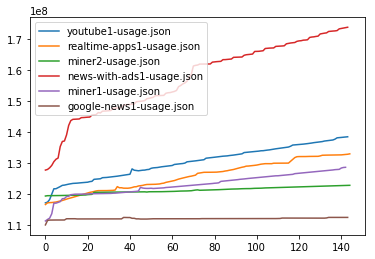

In [9]:
for name, val in mems.items():
    plt.plot(val, label=name)
plt.legend()
plt.show()

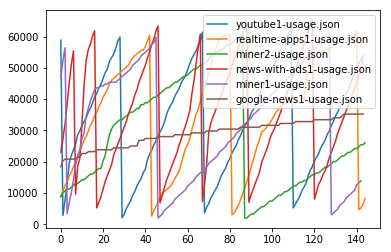

In [10]:
for name, val in ctimes.items():
    plt.plot(val, label=name)
plt.legend()
plt.show()